### Build a Basic Neural Network

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

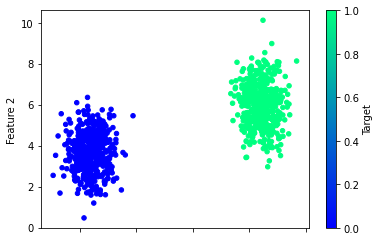

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with dummy data.
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data.
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model.
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Train and Test a Basic Neural Network

In [12]:
# Fit the model to the training data.
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 692us/step - loss: 0.6949 - accuracy: 0.5067
Epoch 2/100
24/24 [==============================] - 0s 675us/step - loss: 0.6940 - accuracy: 0.5067
Epoch 3/100
24/24 [==============================] - 0s 657us/step - loss: 0.6934 - accuracy: 0.5067
Epoch 4/100
24/24 [==============================] - 0s 657us/step - loss: 0.6930 - accuracy: 0.5067
Epoch 5/100
24/24 [==============================] - 0s 675us/step - loss: 0.6927 - accuracy: 0.5067
Epoch 6/100
24/24 [==============================] - 0s 652us/step - loss: 0.6921 - accuracy: 0.4920
Epoch 7/100
24/24 [==============================] - 0s 675us/step - loss: 0.6913 - accuracy: 0.5067
Epoch 8/100
24/24 [==============================] - 0s 609us/step - loss: 0.6900 - accuracy: 0.5067
Epoch 9/100
24/24 [==============================] - 0s 632us/step - loss: 0.6879 - accuracy: 0.5067
Epoch 10/100
24/24 [==============================] - 0s 696us/step - loss: 0.6845 - accura

<AxesSubplot:>

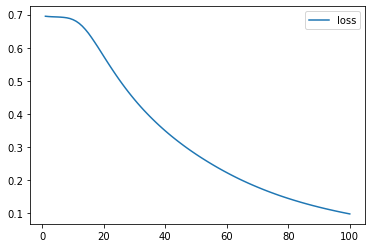

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

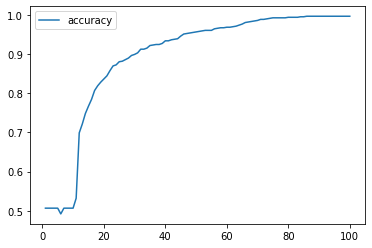

In [14]:
# Plot the accuracy.
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: 0.0973 - accuracy: 1.0000 - 1s/epoch - 170ms/step
Loss: 0.0973481833934784, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 1s 1s/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

### Nuances of Neural Networks on Nonlinear Numbers.

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

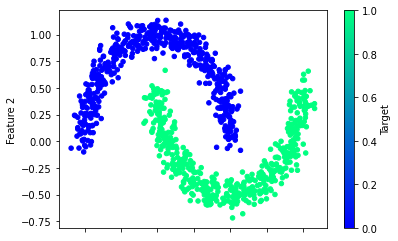

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [18]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [19]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 675us/step - loss: 1.3246 - accuracy: 0.3653
Epoch 2/100
24/24 [==============================] - 0s 659us/step - loss: 1.1835 - accuracy: 0.3827
Epoch 3/100
24/24 [==============================] - 0s 631us/step - loss: 1.0840 - accuracy: 0.3920
Epoch 4/100
24/24 [==============================] - 0s 652us/step - loss: 1.0165 - accuracy: 0.4120
Epoch 5/100
24/24 [==============================] - 0s 675us/step - loss: 0.9671 - accuracy: 0.4267
Epoch 6/100
24/24 [==============================] - 0s 694us/step - loss: 0.9274 - accuracy: 0.4400
Epoch 7/100
24/24 [==============================] - 0s 739us/step - loss: 0.8938 - accuracy: 0.4480
Epoch 8/100
24/24 [==============================] - 0s 718us/step - loss: 0.8661 - accuracy: 0.4573
Epoch 9/100
24/24 [==============================] - 0s 652us/step - loss: 0.8412 - accuracy: 0.4693
Epoch 10/100
24/24 [==============================] - 0s 675us/step - loss: 0.8194 - accura

<AxesSubplot:>

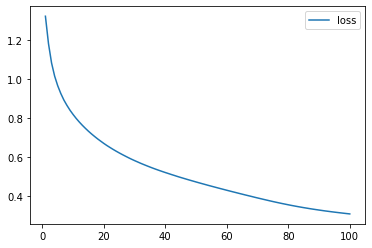

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

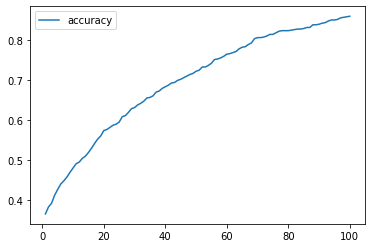

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Create the Connective Tissue, the Multiple Neuron Neural Network.

In [22]:
# Generate our new Sequential model
new_model = tf.keras.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 739us/step - loss: 0.9076 - accuracy: 0.2347
Epoch 2/100
24/24 [==============================] - 0s 675us/step - loss: 0.8569 - accuracy: 0.2480
Epoch 3/100
24/24 [==============================] - 0s 674us/step - loss: 0.8130 - accuracy: 0.2760
Epoch 4/100
24/24 [==============================] - 0s 709us/step - loss: 0.7757 - accuracy: 0.2987
Epoch 5/100
24/24 [==============================] - 0s 631us/step - loss: 0.7424 - accuracy: 0.3373
Epoch 6/100
24/24 [==============================] - 0s 696us/step - loss: 0.7142 - accuracy: 0.3667
Epoch 7/100
24/24 [==============================] - 0s 674us/step - loss: 0.6889 - accuracy: 0.4067
Epoch 8/100
24/24 [==============================] - 0s 739us/step - loss: 0.6668 - accuracy: 0.4427
Epoch 9/100
24/24 [==============================] - 0s 739us/step - loss: 0.6467 - accuracy: 0.4627
Epoch 10/100
24/24 [==============================] - 0s 762us/step - loss: 0.6282 - accura